<a href="https://colab.research.google.com/github/Askoye/hello-world/blob/master/Copy_of_Data_Cleaning_and_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Reading our dataset


In [1]:
# Importing our libraries
import pandas as pd # To put data in tabular form of rows and columns.
import numpy as np # To perform a number of mathematical operations on arrays
import matplotlib.pyplot as plt # For visualization in Python
import seaborn as sns # For making statistical graphics

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Reading the top of our dataset
df=pd.read_csv("Bank_Personal_Loan_Modelling.csv")
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [3]:
# Reading the bottom of our dataset
df.tail()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


In [4]:
# Checking the number of rows and columns
df.shape

(5000, 14)

Our data has 5,000 entries and 14 columns which are shown below.

In [5]:
# Names of our columns
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

## Cleaning our dataset


### Tidying our dataset

In [6]:
# Change column names to lowercase and replace spacing with underscore
df.columns=df.columns.str.lower().str.replace(' ','_')
df.head(2)

,id,age,experience,income,zip_code,family,ccavg,education,mortgage,personal_loan,securities_account,cd_account,online,creditcard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0


Our column names are now tidy.

In [7]:
# Dropping irrelevant column id
df.drop(['id'], axis = 1, inplace= True) 
# confirming that column has been dropped
df.head()

,age,experience,income,zip_code,family,ccavg,education,mortgage,personal_loan,securities_account,cd_account,online,creditcard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


The column we do not need is dropped

In [8]:
# Check whether each column has appropriate data types
df.dtypes

age                     int64
experience              int64
income                  int64
zip_code                int64
family                  int64
ccavg                 float64
education               int64
mortgage                int64
personal_loan           int64
securities_account      int64
cd_account              int64
online                  int64
creditcard              int64
dtype: object

Family, education,personal_loan,securities_account,cd_account	online and creditcard should be categorical.

### Dealing with missing data

In [9]:
# Checking for null values
df.isnull().sum()

age                   0
experience            0
income                0
zip_code              0
family                0
ccavg                 0
education             0
mortgage              0
personal_loan         0
securities_account    0
cd_account            0
online                0
creditcard            0
dtype: int64

We have no missing values in our dataset so we are good to go.

### Checking for consistency and uniformity

In [10]:
# Checking for unique values for each column
for column in df.columns:
  print('\n')
  print( df[column].nunique())
  print(df[column].unique())



45
[25 45 39 35 37 53 50 34 65 29 48 59 67 60 38 42 46 55 56 57 44 36 43 40
 30 31 51 32 61 41 28 49 47 62 58 54 33 27 66 24 52 26 64 63 23]


47
[ 1 19 15  9  8 13 27 24 10 39  5 23 32 41 30 14 18 21 28 31 11 16 20 35
  6 25  7 12 26 37 17  2 36 29  3 22 -1 34  0 38 40 33  4 -2 42 -3 43]


162
[ 49  34  11 100  45  29  72  22  81 180 105 114  40 112 130 193  21  25
  63  62  43 152  83 158  48 119  35  41  18  50 121  71 141  80  84  60
 132 104  52 194   8 131 190  44 139  93 188  39 125  32  20 115  69  85
 135  12 133  19  82 109  42  78  51 113 118  64 161  94  15  74  30  38
   9  92  61  73  70 149  98 128  31  58  54 124 163  24  79 134  23  13
 138 171 168  65  10 148 159 169 144 165  59  68  91 172  55 155  53  89
  28  75 170 120  99 111  33 129 122 150 195 110 101 191 140 153 173 174
  90 179 145 200 183 182  88 160 205 164  14 175 103 108 185 204 154 102
 192 202 162 142  95 184 181 143 123 178 198 201 203 189 151 199 224 218]


467
[91107 90089 94720 94112 91330 92121 9

Our data appears not to have any anomalies

### Dealing with duplicated data

In [11]:
# Checking for duplicates
df.duplicated().any()

False

Our data has no duplicates

### Checking for Outliers




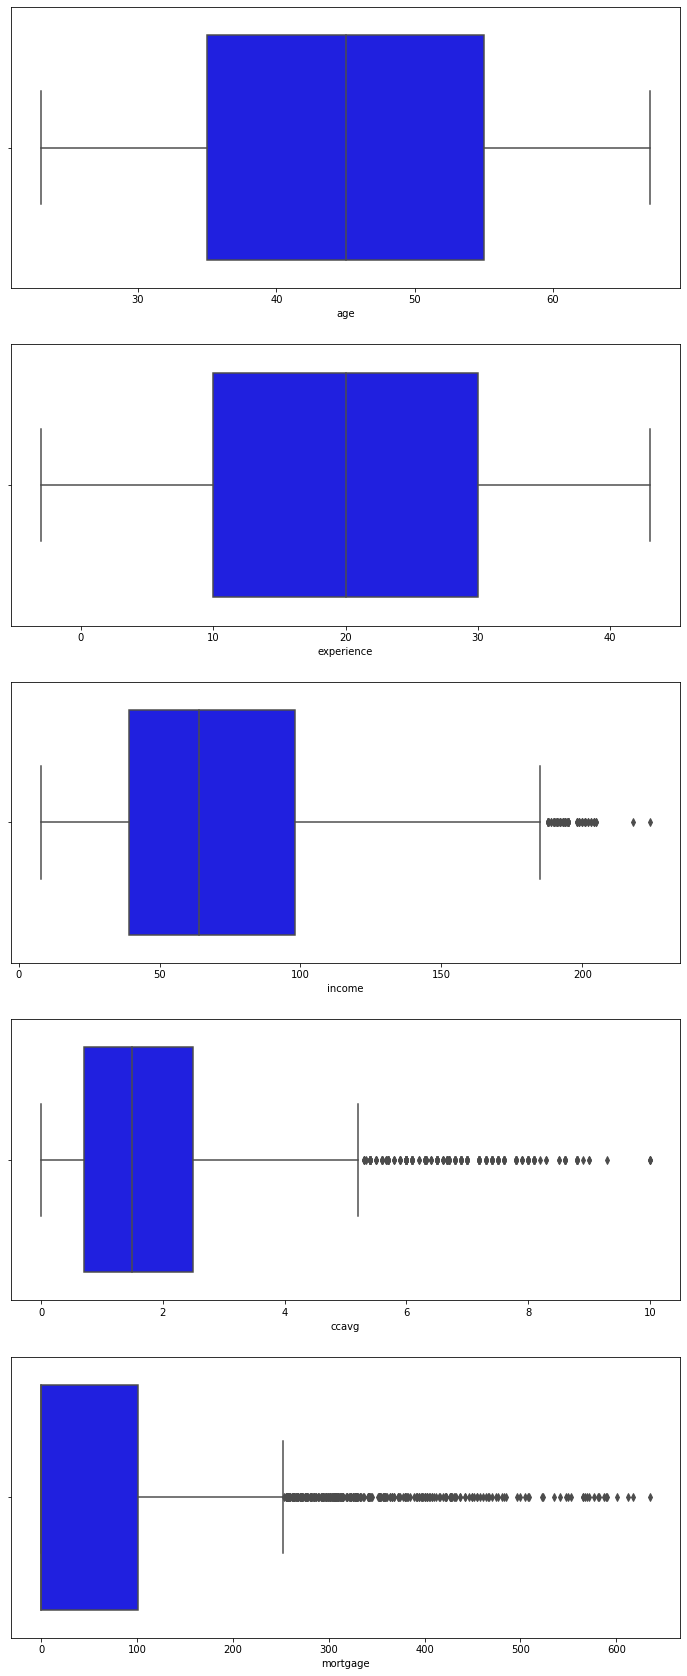

In [12]:
# Checking for outliers using boxplots for our numeric variables
fig, ((ax1),(ax2), (ax3),(ax4),(ax5)) = plt.subplots(5 ,figsize=(12, 30))
#fig.suptitle('Boxplots')
print('\n')
sns.boxplot(df['age'], ax=ax1, color='blue')
sns.boxplot(df['experience'], ax=ax2, color='blue')
sns.boxplot(df['income'], ax=ax3, color='blue')
sns.boxplot(df['ccavg'], ax=ax4, color='blue')
sns.boxplot(df['mortgage'], ax=ax5, color='blue')



plt.show()

There are outliers in mortgage, income and average spending on credit cards per month.  ###To be discussed

In [13]:
# Checking the 90th percentile of our variables with outliers so that our data is within that range
print("income nintieth percentile: ",df['income'].quantile(0.90))
print("CCavg nintieth percentile: ",df['ccavg'].quantile(0.90))
print("mortgage nintieth percentile: ",df['mortgage'].quantile(0.90))

income nintieth percentile:  145.0
CCavg nintieth percentile:  4.3
mortgage nintieth percentile:  200.0


The above is our nintieth percentiles

In [14]:
# Removing outliers
df["income"] = np.where(df["income"] >145, 145,df['income'])
df["ccavg"] = np.where(df["ccavg"] >4.3, 4.3,df['income'])
df["income"] = np.where(df["mortgage"] >200, 200,df['mortgage'])

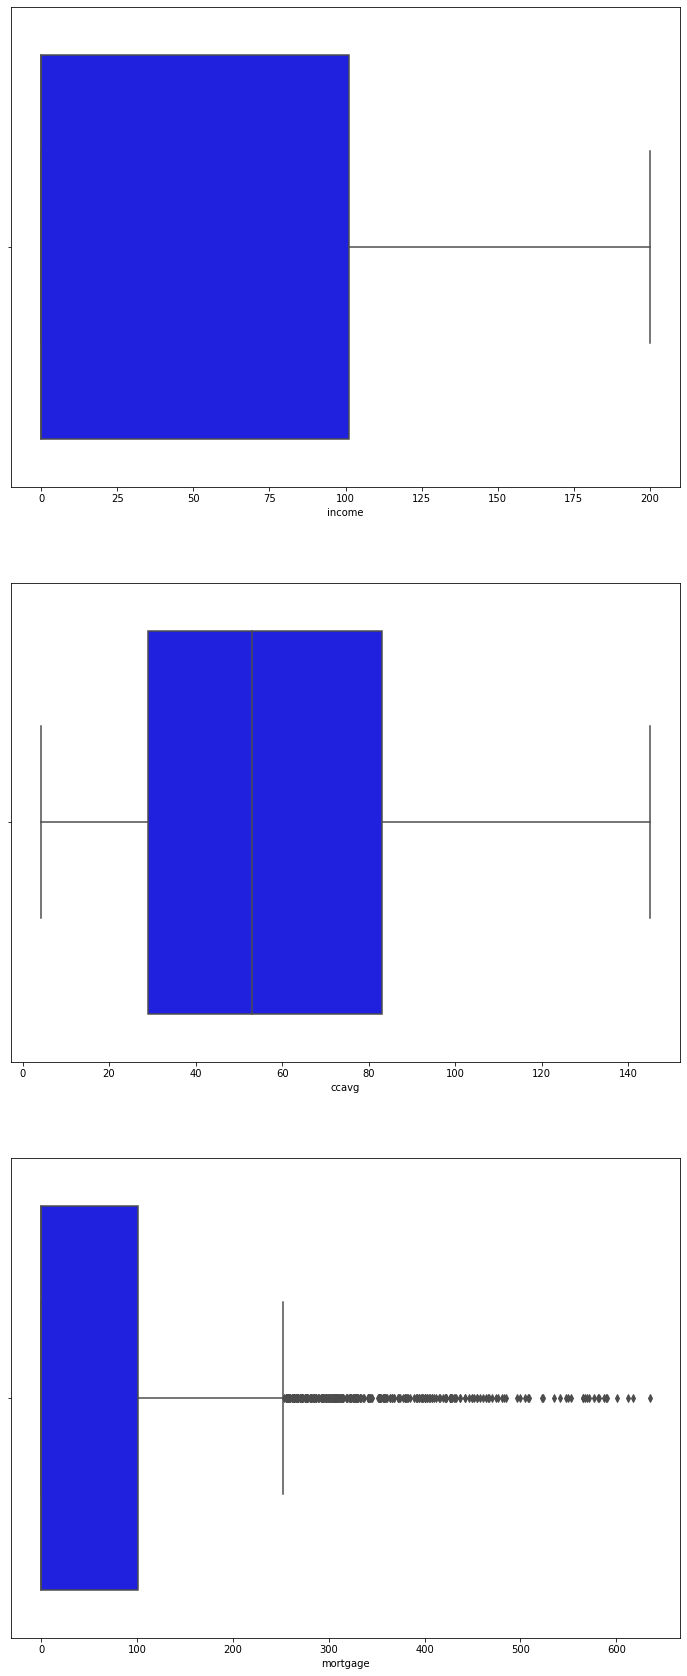

In [15]:
fig, ((ax1),(ax2), (ax3)) = plt.subplots(3 ,figsize=(12, 30))
#fig.suptitle('Boxplots')
print('\n')
sns.boxplot(df['income'], ax=ax1, color='blue')
sns.boxplot(df['ccavg'], ax=ax2, color='blue')
sns.boxplot(df['mortgage'], ax=ax3, color='blue')

## EDA

In [16]:
import pandas_profiling as pp
pp.ProfileReport(df)

Experience and Age gives a positive correlation ,as Experience increases Age also increases.
We can see the education level that more people are in is the undergraduate level.

Mortgage gives a positive correlation with income	
Some variables showed a big percentage of there data contained Zero values

Income has 3462 zeros which is (69.2%) of its data as well as mortgage with the same result
mortgage has 3462 zeros (69.2%)




### Histograms, Boxplots and Scatterplots

Plotting histograms to check that if data columns are normal or almost normal or not

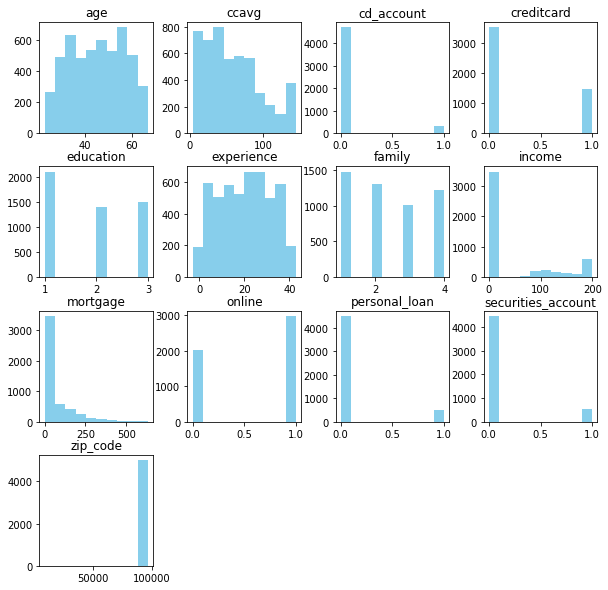

In [ ]:
df.hist(figsize=(10,10),color="skyblue",grid=False)
plt.show()

1.Here we can see "Age" feature is almost normally distributed where majority of customers are between age 30 to 60 years.
Also we can see median is equal to mean.

2."Experience" feature is also almost normally distibuted and mean is also equal to median.But there are some negative values present which should be deleted, as Experience can not be negative.

3.We can see for "Income" , "CCAvg" , "Mortgage" distribution is positively skewed.

4.For "Income" mean is greater than median.Also we can confirm from this that majority of the customers have income between 45-55K.

5.For "CCAvg" majority of the customers spend less than 2.5K and the average spending is between 0-10K.

6.For "Mortage" we can see that almost 70% of the customers have Value of house mortgage less than 40K and the maximum value is 635K.

7.Distribution of "Family" and "Education" are evenly distributed

## Boxplots

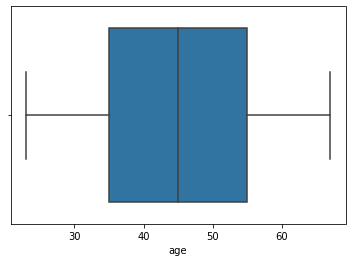

In [26]:
sns.boxplot(x=df["age"])

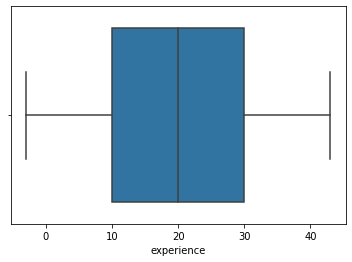

In [27]:
sns.boxplot(x=df["experience"])

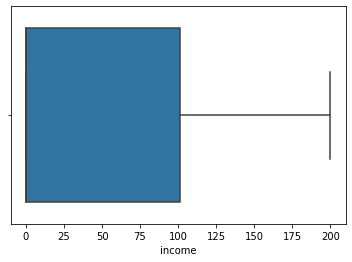

In [42]:
sns.boxplot(x=df["income"])

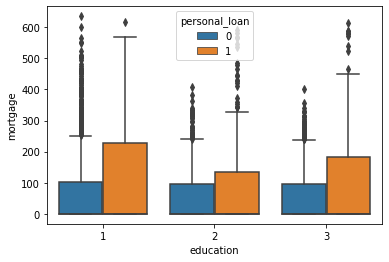

In [29]:
sns.boxplot(x="education", y='mortgage', hue="personal_loan", data=df)

## Countplots

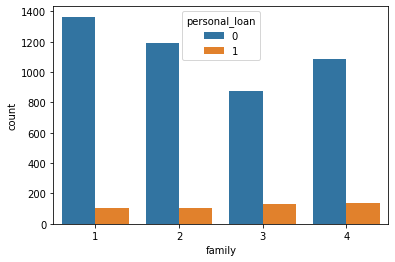

In [32]:
sns.countplot(x='family',data=df,hue='personal_loan')

There is no that much impact on Personal Loan if we consider Family attribute.
But the Family with size 3 is taking more Personal loan as compare to other family size.

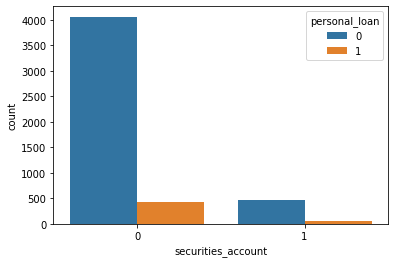

In [34]:
sns.countplot(x="securities_account", data=df,hue="personal_loan")


The Majority are customers who do not have Personal loan , have Securities Account.

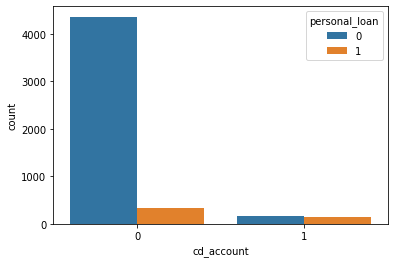

In [36]:
sns.countplot(x='cd_account',data=df,hue='personal_loan')

The customers having no CDAccount do not have Personal loan.
And the customers with CDAccount almost have Personal Loan.

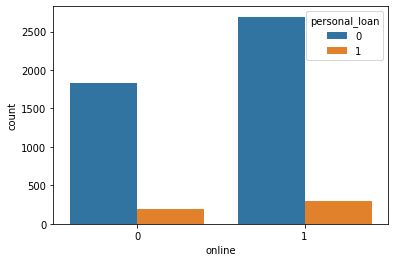

In [37]:
sns.countplot(x='online',data=df,hue='personal_loan')

Customers with Personal Loan have less count in both the conditions

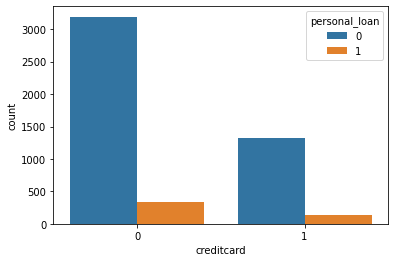

In [39]:
sns.countplot(x='creditcard',data=df,hue='personal_loan')

Customers with Personal Loan have less count in both the conditions.

### Heatmap

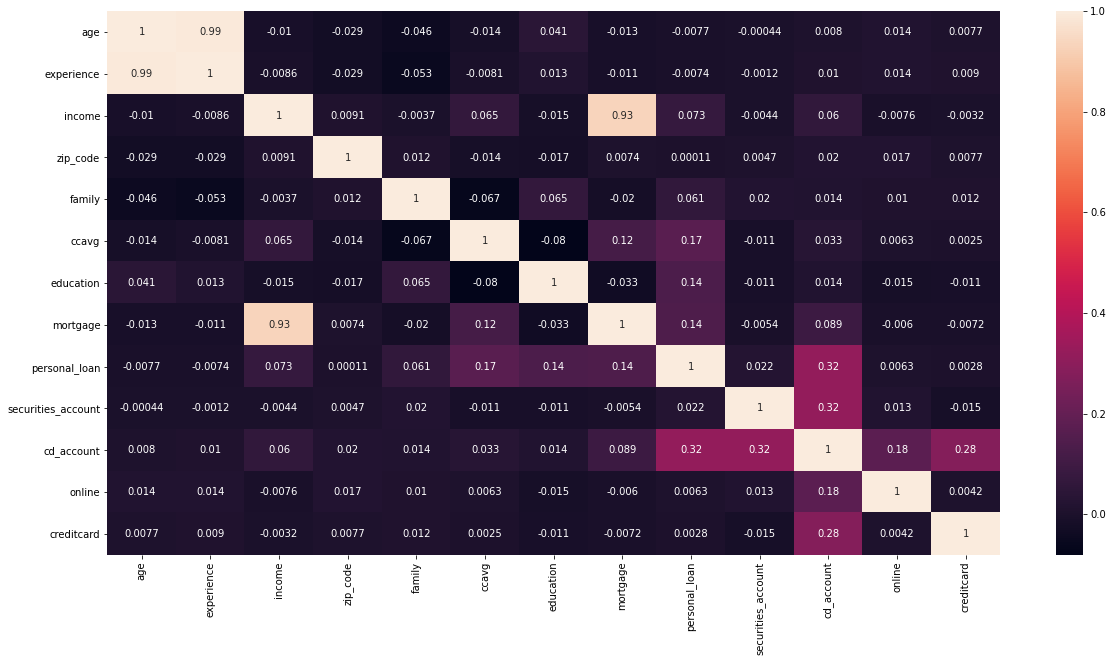

In [41]:
plt.subplots(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)

### EDA Summary Report

1.Here we can see "Age" feature is almost normally distributed where majority of customers are between age 30 to 60 years.Also we can see median is equal to mean.

2."Experience" feature is also almost normally distibuted and mean is also equal to median.But there are some negative values present which should be deleted, as Experience can not be negative.

3.We can see for "Income" , "CCAvg" , "Mortgage" distribution is positively skewed.

4.For "Income" mean is greater than median.Also we can confirm from this that majority of the customers have income between 45-55K.

5.For "CCAvg" majority of the customers spend less than 2.5K and the average spending is between 0-10K.

6.For "Mortage" we can see that almost 70% of the customers have Value of house mortgage less than 40K and the maximum value is 635K.

7.Distribution of "Family" and "Education" are evenly distributed

8.Income and CCAvg is moderately correlated.

9.Experience and Age gives a positive correlation.

10.Families with income less than 100K are less likely to take loan,than families with high income.

11.The customers whose education level is 1 is having more income than the others.

12.The customers with and without Personal Loan have high Mortage.

13.Families with income less than 100K are less likely to take loan,than families with high income.

14.There is no that much impact on Personal Loan if we consider Family attribute. 
But the Family with size 3 is taking more Personal loan as compare to other family size.

15.The Majority is the customers who do not have Personal loan have Securities Account.

16.The customers having no CDAccount do not have Personal loan.

17.Customers with Personal Loan have less count in both the conditions.

### Multicollinearity test

In [ ]:
df.columns

Index(['age', 'experience', 'income', 'zip_code', 'family', 'ccavg',
       'education', 'mortgage', 'personal_loan', 'securities_account',
       'cd_account', 'online', 'creditcard'],
      dtype='object')

In [ ]:
# Selecting independent variables
x= df.loc[:, df.columns != 'personal_loan'] # Independent variables
# Let's display the correlations between the variables
correlations = x.corr()
correlations

,age,experience,income,zip_code,family,ccavg,education,mortgage,securities_account,cd_account,online,creditcard
age,1.000000,0.994215,-0.009965,-0.029216,-0.046418,-0.013717,0.041334,-0.012539,-0.000436,0.008043,0.013702,0.007681
experience,0.994215,1.000000,-0.008621,-0.028626,-0.052563,-0.008058,0.013152,-0.010582,-0.001232,0.010353,0.013898,0.008967
income,-0.009965,-0.008621,1.000000,0.009134,-0.003729,0.064852,-0.015474,0.932641,-0.004362,0.060024,-0.007614,-0.003204
zip_code,-0.029216,-0.028626,0.009134,1.000000,0.011778,-0.013559,-0.017377,0.007383,0.004704,0.019972,0.016990,0.007691
family,-0.046418,-0.052563,-0.003729,0.011778,1.000000,-0.067213,0.064929,-0.020445,0.019994,0.014110,0.010354,0.011588
ccavg,-0.013717,-0.008058,0.064852,-0.013559,-0.067213,1.000000,-0.080451,0.115277,-0.011024,0.032834,0.006289,0.002463
education,0.041334,0.013152,-0.015474,-0.017377,0.064929,-0.080451,1.000000,-0.033327,-0.010812,0.013934,-0.015004,-0.011014
mortgage,-0.012539,-0.010582,0.932641,0.007383,-0.020445,0.115277,-0.033327,1.000000,-0.005411,0.089311,-0.005995,-0.007231
securities_account,-0.000436,-0.001232,-0.004362,0.004704,0.019994,-0.011024,-0.010812,-0.005411,1.000000,0.317034,0.012627,-0.015028
cd_account,0.008043,0.010353,0.060024,0.019972,0.014110,0.032834,0.013934,0.089311,0.317034,1.000000,0.175880,0.278644


In [ ]:
# Using correlations to ccompute vif score
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)

,age,experience,income,zip_code,family,ccavg,education,mortgage,securities_account,cd_account,online,creditcard
age,93.455195,-92.898215,0.154844,0.029445,-0.358363,0.291222,-2.603011,-0.113353,-0.191141,0.317287,-0.080032,-0.001503
experience,-92.898215,93.349011,-0.167322,-0.000878,0.411033,-0.279880,2.572448,0.135862,0.193178,-0.325152,0.066002,-0.005608
income,0.154844,-0.167322,7.855116,-0.016961,-0.095422,0.320124,-0.102919,-7.390517,-0.077977,0.237875,-0.027026,-0.095988
zip_code,0.029445,-0.000878,-0.016961,1.002180,-0.010105,0.015547,0.018180,0.008899,0.001686,-0.017995,-0.014060,-0.002539
family,-0.358363,0.411033,-0.095422,-0.010105,1.014630,0.057059,-0.050436,0.102092,-0.016474,-0.010154,-0.010329,-0.010252
ccavg,0.291222,-0.279880,0.320124,0.015547,0.057059,1.038634,0.063493,-0.412216,0.017469,-0.023739,-0.002625,0.002567
education,-2.603011,2.572448,-0.102919,0.018180,-0.050436,0.063493,1.086587,0.123057,0.030864,-0.047917,0.023926,0.023457
mortgage,-0.113353,0.135862,-7.390517,0.008899,0.102092,-0.412216,0.123057,7.978773,0.115421,-0.341763,0.052557,0.131530
securities_account,-0.191141,0.193178,-0.077977,0.001686,-0.016474,0.017469,0.030864,0.115421,1.133668,-0.413591,0.058395,0.132831
cd_account,0.317287,-0.325152,0.237875,-0.017995,-0.010154,-0.023739,-0.047917,-0.341763,-0.413591,1.291033,-0.220527,-0.366470


Age, experience, mortgage and income have a very high VIF score of 93,93, 12 and 12 respectively. Meaning they correlate to one another

In [ ]:
# Dropping two columns with high vif
revised = x.drop(columns=['experience','mortgage'])

correlations = revised.corr()
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)


,age,income,zip_code,family,ccavg,education,securities_account,cd_account,online,creditcard
age,1.005538,0.008572,0.028548,0.050408,0.013821,-0.043312,0.000788,-0.005360,-0.014493,-0.007445
income,0.008572,1.009467,-0.008718,-0.000675,-0.061822,0.012207,0.029019,-0.078832,0.021685,0.025841
zip_code,0.028548,-0.008718,1.002170,-0.010214,0.016004,0.018071,0.001559,-0.017618,-0.014118,-0.002685
family,0.050408,-0.000675,-0.010214,1.011529,0.063530,-0.063280,-0.018789,-0.004380,-0.011287,-0.011900
ccavg,0.013821,-0.061822,0.016004,0.063530,1.016539,0.077364,0.023991,-0.042329,0.000280,0.009339
education,-0.043312,0.012207,0.018071,-0.063280,0.077364,1.013913,0.023818,-0.033853,0.021323,0.021644
securities_account,0.000788,0.029019,0.001559,-0.018789,0.023991,0.023818,1.131607,-0.407993,0.057502,0.130945
cd_account,-0.005360,-0.078832,-0.017618,-0.004380,-0.042329,-0.033853,-0.407993,1.275301,-0.218053,-0.360863
online,-0.014493,0.021685,-0.014118,-0.011287,0.000280,0.021323,0.057502,-0.218053,1.038420,0.057906
creditcard,-0.007445,0.025841,-0.002685,-0.011900,0.009339,0.021644,0.130945,-0.360863,0.057906,1.102790


Our VIFs are now healthy.

### Upsample minority class

In [ ]:
# Checking if our dataset is balanced
df['personal_loan'].value_counts()

0    4520
1     480
Name: personal_loan, dtype: int64

Our dataset is highly imbalanced.

In [ ]:
# Divide by category
with_acc= df[df['personal_loan']==1]
without=df[df['personal_loan']==0]
# Checking the shape of our division
print(with_acc.shape, without.shape)

(480, 13) (4520, 13)


In [ ]:
# Algorithms to help in upsampling
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss

In [ ]:
# Separating our dataset into independent and dependent variables
independent= df.loc[:, df.columns != 'personal_loan'] # Independent variables

dependent= df.iloc[:, df.columns == 'personal_loan'] # Dependent variable

In [ ]:
# Implementing Oversampling for Handling Imbalanced 
smk = SMOTETomek(random_state=42)
independent_res,dependent_res=smk.fit_sample(independent,dependent)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
# Checking the shape of our dataset
independent_res.shape,dependent_res.shape

((8734, 12), (8734,))

In [ ]:
# Showing the shape of the upasmpled clusters
from collections import Counter
print('Resampled dataset shape {}'.format(Counter(dependent_res)))

Resampled dataset shape Counter({0: 4367, 1: 4367})


Our dataset has been upsampled.